In [10]:
import numpy as np
import pandas as pd

from requests import get
from bs4 import BeautifulSoup

import re

import os
import json

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a
import wrangle as w

np.random.seed(123)

In [2]:
df = a.get_data_json()

In [3]:
df.head()

,repo,language,readme_contents
0,DroidPluginTeam/DroidPlugin,Java,Droid Plugin\r\n======\r\n\r\n[中文文档](readme_cn...
1,angular-app/angular-app,JavaScript,[![Build Status](https://secure.travis-ci.org/...
2,doctrine/event-manager,PHP,# Doctrine Event Manager\n\n[![Build Status](h...
3,huluoyang/freecodecamp.cn,JavaScript,![](https://s3.amazonaws.com/freecodecamp/wide...
4,spolu/breach_core,JavaScript,### Breach: A Browser for the HTML5 Era\n\n**M...


In [4]:
df = w.clean_df(df)

In [5]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,readme_length
0,DroidPluginTeam/DroidPlugin,Java,Droid Plugin\r\n======\r\n\r\n[中文文档](readme_cn...,droid plugin readmecnmd fllow githubhttpsgithu...,droid plugin readmecnmd fllow githubhttpsgithu...,droid plugin readmecnmd fllow githubhttpsgithu...,4295
1,angular-app/angular-app,JavaScript,[![Build Status](https://secure.travis-ci.org/...,build statushttpssecuretravisciorgangularappan...,build statushttpssecuretravisciorgangularappan...,build statushttpssecuretravisciorgangularappan...,8907
2,doctrine/event-manager,other,# Doctrine Event Manager\n\n[![Build Status](h...,doctrine event manager build statushttpsgithub...,doctrin event manag build statushttpsgithubcom...,doctrine event manager build statushttpsgithub...,840
3,huluoyang/freecodecamp.cn,JavaScript,![](https://s3.amazonaws.com/freecodecamp/wide...,httpss3amazonawscomfreecodecampwidesocialbanne...,httpss3amazonawscomfreecodecampwidesocialbanne...,httpss3amazonawscomfreecodecampwidesocialbanne...,3267
4,spolu/breach_core,JavaScript,### Breach: A Browser for the HTML5 Era\n\n**M...,breach browser html5 era modular everything br...,breach browser html5 era modular everyth brows...,breach browser html5 era modular everything br...,1069


In [8]:
train, validate, test = w.split_data(df, 'language')

In [9]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,readme_length
70,inkling/Subliminal,Objective-C,"<p align=""center"" >\n <img src=""http://inklin...",p aligncenter img srchttpinklinggithubiosublim...,p aligncent img srchttpinklinggithubiosublimin...,p aligncenter img srchttpinklinggithubiosublim...,11215
59,microsoftarchive/android-sliding-layer-lib,Java,6Wunderkinder SlidingLayer for Android\n======...,6wunderkinder slidinglayer android repository ...,6wunderkind slidinglay android repositori host...,6wunderkinder slidinglayer android repository ...,4266
92,jamesob/tinychain,Python,"# ⛼ tinychain\n\n*Putting the rough in ""[roug...",tinychain putting rough rough consensushttpsto...,tinychain put rough rough consensushttpstoolsi...,tinychain putting rough rough consensushttpsto...,8333
104,Cleveroad/CRNetworkButton,Swift,# CRNetworkButton [![Awesome](https://cdn.rawg...,crnetworkbutton awesomehttpscdnrawgitcomsindre...,crnetworkbutton awesomehttpscdnrawgitcomsindre...,crnetworkbutton awesomehttpscdnrawgitcomsindre...,5268
97,zhangxinxu/mobilebone,JavaScript,"mobilebone.js\n=============\n\n<img src=""http...",mobilebonejs img srchttpswwwzhangxinxucomgithu...,mobilebonej img srchttpswwwzhangxinxucomgithub...,mobilebonejs img srchttpswwwzhangxinxucomgithu...,5908


# Explore readme_length vs language
## Is readme_length associated with language?

## Visualize

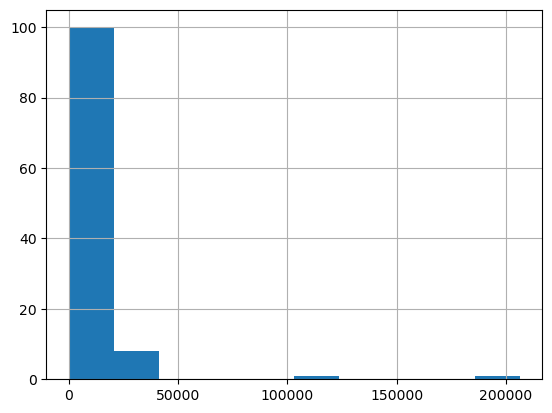

In [12]:
# first plot distribution of readme_length
df.readme_length.hist()
plt.show()

In [14]:
# there are two entries with readme_lengths that are way above normal;
# both have 'other' as their language
df[df.readme_length > 50000].head()

,repo,language,readme_contents,clean,stemmed,lemmatized,readme_length
24,laurent22/joplin,other,<!-- DONATELINKS -->\n[![Donate using PayPal](...,donatelinks donate using paypalhttpsrawgithubu...,donatelink donat use paypalhttpsrawgithubuserc...,donatelinks donate using paypalhttpsrawgithubu...,107471
26,rust-unofficial/awesome-rust,other,# Awesome Rust [![build badge](https://github....,awesome rust build badgehttpsgithubcomrustunof...,awesom rust build badgehttpsgithubcomrustunoff...,awesome rust build badgehttpsgithubcomrustunof...,206311


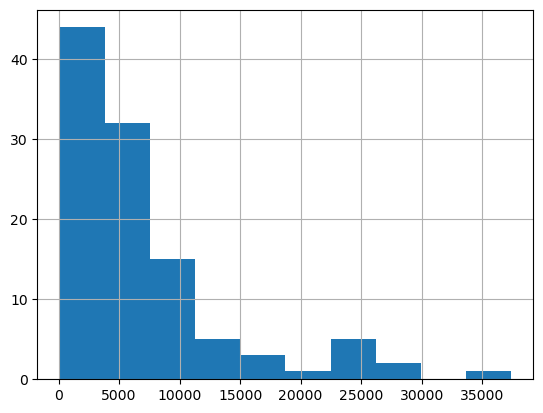

In [16]:
# now plot distribution of readme_length without the two outliers
df[df.readme_length<50000].readme_length.hist()
plt.show()

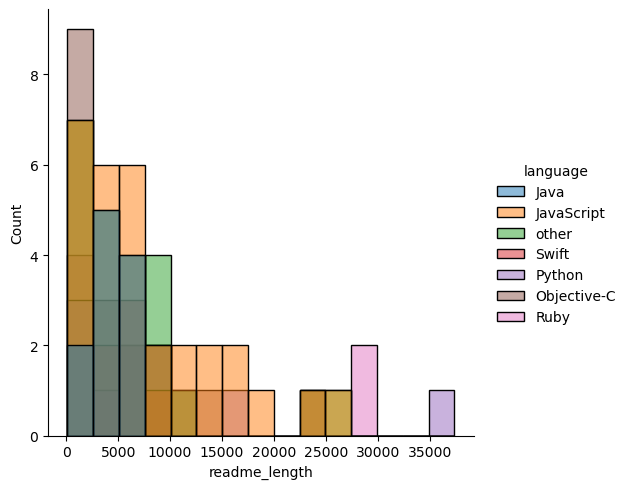

In [19]:
# make a histplot hued by language to visualize if readme_length is related to language at all
sns.displot(data=df[df.readme_length<50000],x='readme_length', hue='language', kind='hist') 
plt.show()

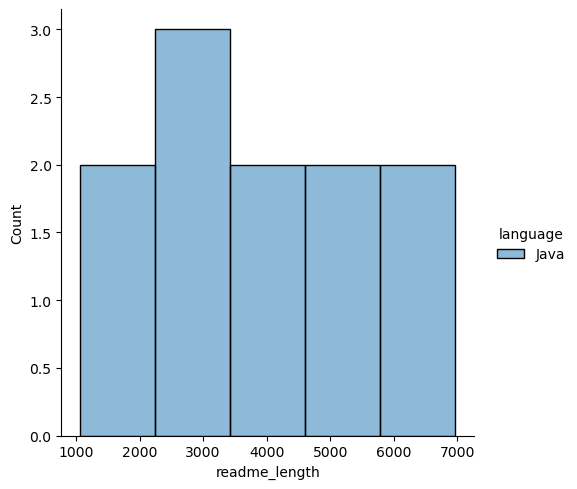

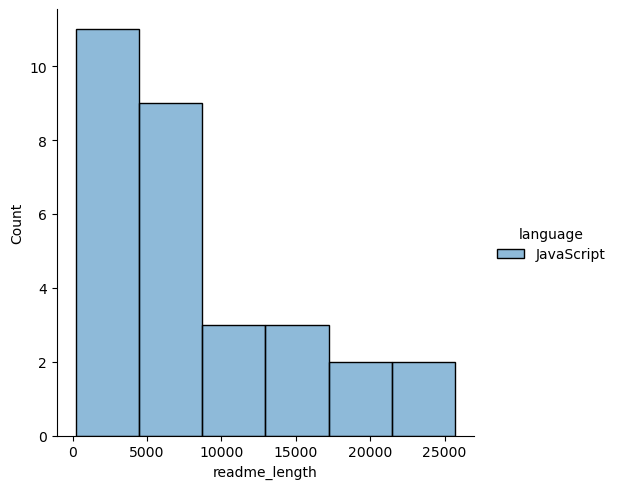

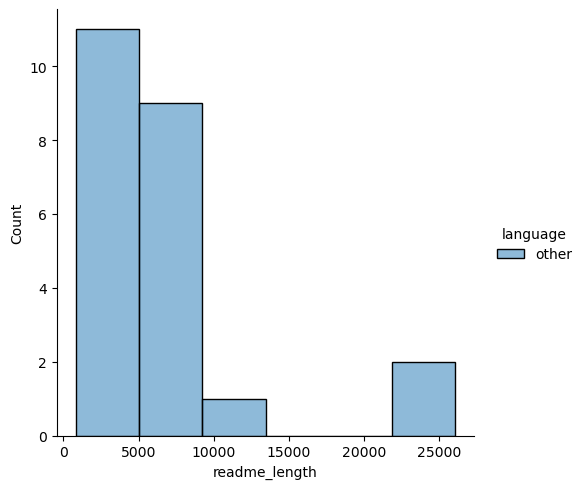

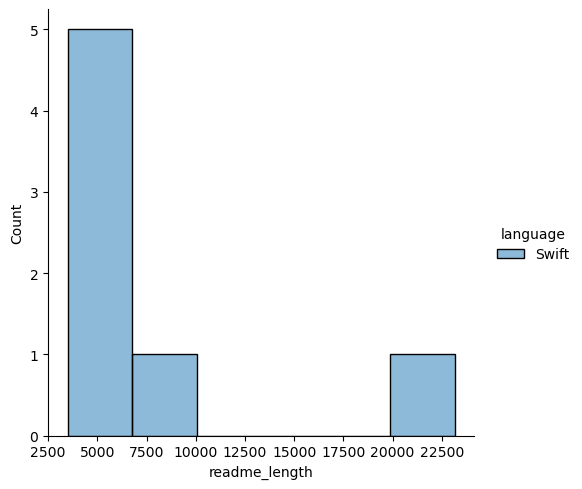

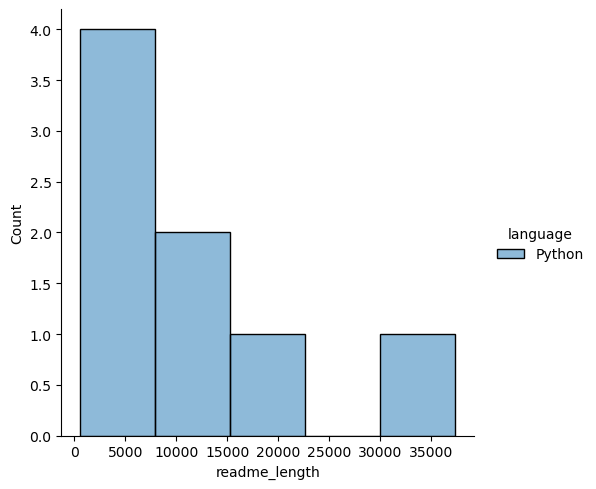

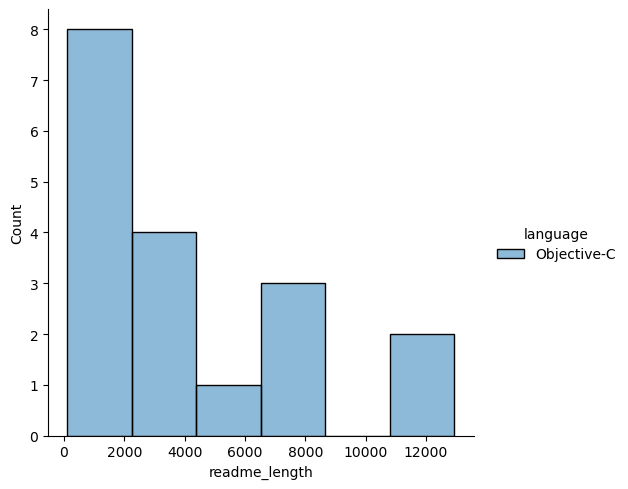

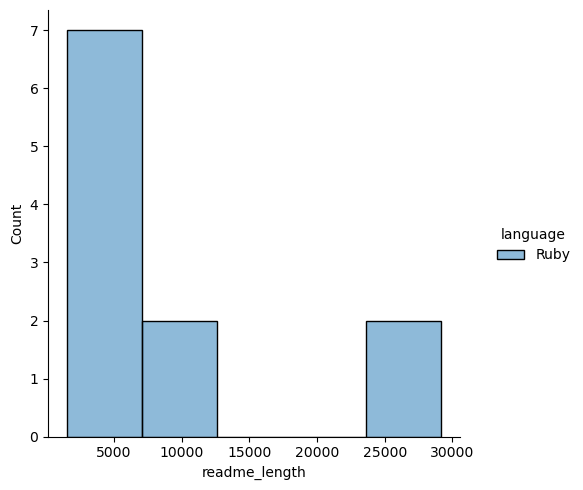

In [23]:
# the plot with everything on top of each other wasn't very useful, so
# plot histplots of readme_length separately for each language
for l in df.language.unique():
    sns.displot(data=df[(df.readme_length<50000) & (df.language == l)],x='readme_length', hue='language', kind='hist') 
    plt.show()

In [24]:
# It doesn't look like this is going to be a useful factor in determining language,
# but let's test it with statistics

### Analyze readme_length vs language with statistics
- $H_0$ There is NO relationship between readme_length and language
- $H_a$ There IS a relationship
- $\alpha$ = .05
continuous vs categorical, not normally distributed, comparing subgroup means to each other
=> mann whitney test

In [25]:
# get stats import
import scipy.stats as stats

In [32]:
# get combinations import for iteration
from itertools import combinations

# mannwhitneyu requires two array-like inputs, so this will iterate over all possible combinations of
# two different languages to test if there is a correlation
for combo in combinations(df.language.unique(), 2):  # 2 for pairs, 3 for triplets, etc
    print(combo)
    print(stats.mannwhitneyu(df[df.language == combo[0]].readme_length, df[df.language == combo[1]].readme_length))

# BOTTOM LINE: only one combination had a p-value < .05

('Java', 'JavaScript')
MannwhitneyuResult(statistic=112.0, pvalue=0.12238176661381711)
('Java', 'other')
MannwhitneyuResult(statistic=105.0, pvalue=0.2717948879571903)
('Java', 'Swift')
MannwhitneyuResult(statistic=20.0, pvalue=0.10419808949220714)
('Java', 'Python')
MannwhitneyuResult(statistic=33.0, pvalue=0.3950411473631288)
('Java', 'Objective-C')
MannwhitneyuResult(statistic=117.0, pvalue=0.43142218968707247)
('Java', 'Ruby')
MannwhitneyuResult(statistic=46.0, pvalue=0.35766176977222996)
('JavaScript', 'other')
MannwhitneyuResult(statistic=399.0, pvalue=0.6911981085861325)
('JavaScript', 'Swift')
MannwhitneyuResult(statistic=99.0, pvalue=0.8310980477007505)
('JavaScript', 'Python')
MannwhitneyuResult(statistic=120.0, pvalue=1.0)
('JavaScript', 'Objective-C')
MannwhitneyuResult(statistic=371.0, pvalue=0.03232158551107478)
('JavaScript', 'Ruby')
MannwhitneyuResult(statistic=166.0, pvalue=0.9882602146633384)
('other', 'Swift')
MannwhitneyuResult(statistic=74.0, pvalue=0.5616318701691

### Summarize readme_length vs language

- p is > .05, in all combinations except one, so we CANNOT reject the null hypothesis 
- In summary, there is no association between readme_length and language

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# Number of mislabeled points out of a total 75 points : 4

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)